**A. Pilih satu bidang yang Anda beserta rekan tim minati, jabarkan alasan
pemilihan bidang tersebut dan jelaskan apa yang ingin dicapai dengan
memilih topik ini.**

Jawaban :

.....

**B. Ceritakan proses mendapatkan data dan informasi lengkap mengenai data
tersebut (seperti waktu, penjelasan setiap kolom, sumber dll). Data yang
digunakan harus data terbaru dengan range 1-4 tahun kebelakang.**

Jawaban:

....

**C. Lakukan pre-processing data dengan memeriksa tipe data, mengganti nama
kolom, memeriksa nilai null, mengubah tipe data (agar bisa di proses),
menampilkan summary, dan menampilkan matriks korelasinya
menggunakan metode metode yang pernah dipelajari.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Cek tipe data
print("Tipe data setiap kolom:")
print(data.dtypes)


Tipe data setiap kolom:
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [ ]:
# Mengganti nama kolom agar lebih sederhana dan konsisten
data.rename(columns={
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume',
    'Dividends': 'dividends',
    'Stock Splits': 'stock_splits'
}, inplace=True)

print("Kolom setelah diubah:")
print(data.columns)

Kolom setelah diubah:
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock_splits'],
      dtype='object')


In [ ]:
# Memeriksa nilai null setelah konversi tipe data
null_values = data.isnull().sum()
print("Jumlah nilai null per kolom:")
print(data.isnull().sum())

Jumlah nilai null per kolom:
date            0
open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64


In [ ]:
# Menampilkan statistik deskriptif dari data numerik
summary_stats = data.describe()
print("Ringkasan statistik:")
print(data.describe())

Ringkasan statistik:
               open          high           low         close        volume  \
count  11289.000000  11289.000000  11289.000000  11289.000000  1.128900e+04   
mean      14.986168     15.185892     14.787731     14.985933  5.064025e+07   
std       14.708247     14.892642     14.526521     14.709644  3.475946e+07   
min        0.121968      0.121968      0.120516      0.120516  0.000000e+00   
25%        0.810214      0.827638      0.797147      0.814571  2.744880e+07   
50%       12.757638     12.917269     12.590077     12.742243  4.456490e+07   
75%       22.624974     22.879999     22.350709     22.617407  6.459720e+07   
max       62.028760     62.292520     60.600833     62.083344  5.677088e+08   

          dividends  stock_splits  
count  11289.000000  11289.000000  
mean       0.001581      0.001373  
std        0.019592      0.051749  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.00

In [ ]:
# 1. Identifikasi kolom dengan tipe data non-numerik
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Kolom non-numerik:", non_numeric_cols)

# 2. Abaikan kolom 'date' dari daftar non-numerik
non_numeric_cols = [col for col in non_numeric_cols if col != 'date']
print("Kolom non-numerik (tanpa kolom 'date'):", non_numeric_cols)

# 3. Jika perlu, hapus kolom non-numerik lainnya dari data untuk analisis numerik
data_numeric = data.drop(columns=non_numeric_cols)
print("Kolom yang tersisa untuk analisis numerik:")
print(data_numeric.columns)

Kolom non-numerik: Index(['date'], dtype='object')
Kolom non-numerik (tanpa kolom 'date'): []
Kolom yang tersisa untuk analisis numerik:
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock_splits'],
      dtype='object')


In [ ]:
# 1. Drop kolom 'date' dari dataset
if 'date' in data.columns:
    data = data.drop(columns=['date'])
    print("Kolom 'date' berhasil dihapus.")
else:
    print("Kolom 'date' tidak ditemukan di dataset.")

# 2. Cek kolom yang tersisa
print("Kolom yang tersisa setelah drop:")
print(data.columns)

Kolom 'date' berhasil dihapus.
Kolom yang tersisa setelah drop:
Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits'], dtype='object')


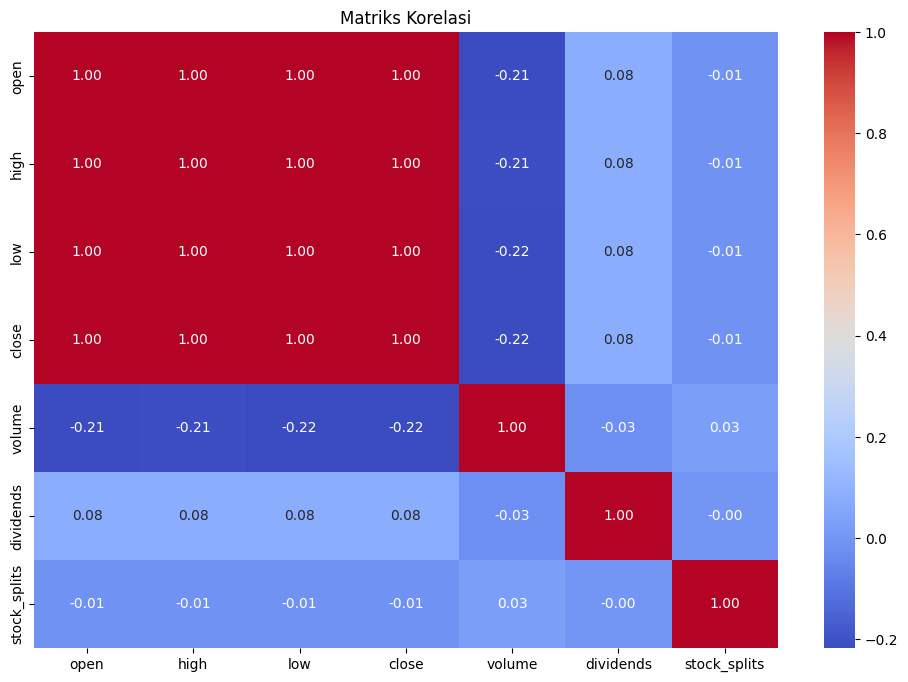

In [ ]:
# Menampilkan korelasi dalam bentuk heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

------------------------------------------------------------------------------------------------------------------------------

**D. Berdasarkan analisis data tersebut, jelaskan alasan pemilihan kolom/fitur
yang relevan untuk menyelesaikan permasalahan yang ingin dicapai.**

Jawaban:

memilih kolom/fitur: open, high, low, close yg memiliki Korelasi yang sangat tinggi (mendekati 1) menunjukkan hubungan erat antara harga pembukaan, tertinggi, terendah, dan penutupan. Hal ini penting untuk memprediksi tren harga saham (klasifikasi) dan pola harga historis (clustering).

# 2. Pengembangan model machine learning. (SCPMK 1534114, 50 Poin)

**A. Gunakan minimal 4 model Machine Learning dari library Spark untuk
menyelesaikan masalah yang Anda pilih. 2 Model sesuai dengan instruksi
(Classification: Gradient Boost Tree, Clustering: K-Means) dan dua
model lain bebas (belum pernah dibahas). Lalu bandingkan hasilnya
menggunakan metriks seperti AUC (ROC Curve), Akurasi, F1 Score,
Presisi, dan Recall untuk Classification dan Silhoute Score untuk
Clustering.**

**Model 1: Classification - Gradient Boost Tree**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Membuat SparkSession
spark = SparkSession.builder.appName("GradientBoostTree").getOrCreate()

# Load data
data = spark.read.csv('data.csv', header=True, inferSchema=True)

# Vectorize features
assembler = VectorAssembler(inputCols=["Open", "High", "Low", "Close"], outputCol="features")
data = assembler.transform(data)

# Membuat kolom target untuk klasifikasi (misal: close > open --> 1, else 0)
data = data.withColumn("label", (data["close"] > data["open"]).cast("integer"))

# Split data
train, test = data.randomSplit([0.8, 0.2], seed=42)

# Gradient Boosted Tree Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="label", maxIter=50)
gbt_model = gbt.fit(train)

# Predict on test data
predictions = gbt_model.transform(test)

# Evaluate
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", metricName="f1")

auc = evaluator_auc.evaluate(predictions)
accuracy = evaluator_accuracy.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print(f"AUC: {auc}")
print(f"Akurasi: {accuracy}")
print(f"F1 Score: {f1_score}")


AUC: 0.6534879733461986
Akurasi: 0.5894736842105263
F1 Score: 0.5585872539071


**Model 2: Clustering - K-Means**

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# K-Means Clustering
kmeans = KMeans(featuresCol="features", k=3, seed=42)  # k=3 (jumlah cluster)
kmeans_model = kmeans.fit(data)

# Predict clusters
kmeans_predictions = kmeans_model.transform(data)

# Evaluate clustering
evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="features", metricName="silhouette")
silhouette_score = evaluator.evaluate(kmeans_predictions)

print(f"Silhouette Score: {silhouette_score}")


Silhouette Score: 0.7921279391022178


**Model 3: Classification - Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)
rf_model = rf.fit(train)

# Predict on test data
rf_predictions = rf_model.transform(test)

# Evaluate
auc_rf = evaluator_auc.evaluate(rf_predictions)
accuracy_rf = evaluator_accuracy.evaluate(rf_predictions)
f1_score_rf = evaluator_f1.evaluate(rf_predictions)

print(f"AUC (Random Forest): {auc_rf}")
print(f"Akurasi (Random Forest): {accuracy_rf}")
print(f"F1 Score (Random Forest): {f1_score_rf}")


AUC (Random Forest): 0.6161981182980973
Akurasi (Random Forest): 0.5661327231121281
F1 Score (Random Forest): 0.5424326031159519


**Model 4: Clustering - Gaussian Mixture**

In [ ]:
from pyspark.ml.clustering import GaussianMixture

# Gaussian Mixture Model
gmm = GaussianMixture(featuresCol="features", k=3, seed=42)
gmm_model = gmm.fit(data)

# Predict clusters
gmm_predictions = gmm_model.transform(data)

# Evaluate clustering
evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="features", metricName="silhouette")
silhouette_score_gmm = evaluator.evaluate(gmm_predictions)

print(f"Silhouette Score (Gaussian Mixture): {silhouette_score_gmm}")


Silhouette Score (Gaussian Mixture): 0.597747819754577


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



**Visualisasi untuk Classification Models (Gradient Boost Tree & Random Forest)**

ROC Curve (Gradient Boost Tree & Random Forest)

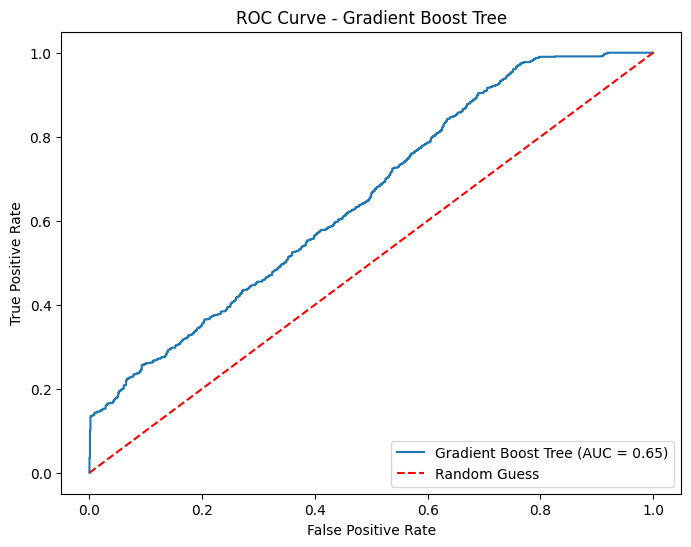

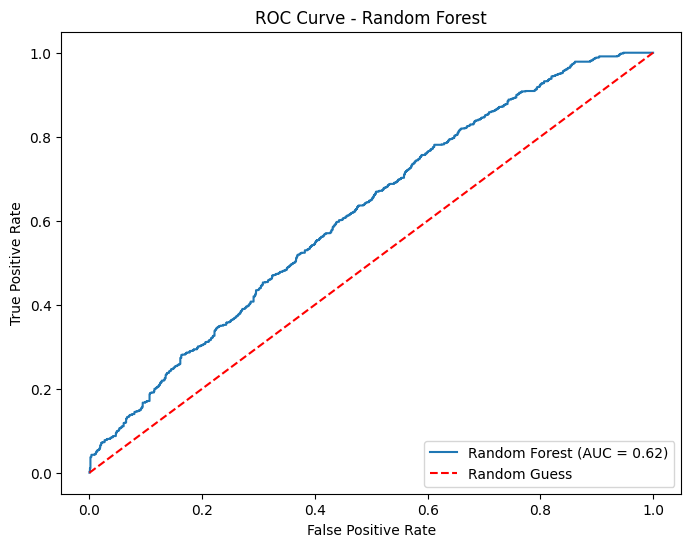

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Membuat ROC Curve
def plot_roc(predictions, model_name):
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
    auc = evaluator.evaluate(predictions)

    # Extract raw prediction probabilities
    roc_data = predictions.select("label", "rawPrediction").rdd.map(
        lambda row: (float(row.rawPrediction[1]), float(row.label))
    ).collect()

    # Sort data by probability
    roc_data = sorted(roc_data, key=lambda x: x[0], reverse=True)

    # Compute true positive rate and false positive rate
    tpr, fpr = [0], [0]
    positive = sum([1 for label in [r[1] for r in roc_data] if label == 1])
    negative = len(roc_data) - positive

    tp, fp = 0, 0
    for _, label in roc_data:
        if label == 1:
            tp += 1
        else:
            fp += 1
        tpr.append(tp / positive)
        fpr.append(fp / negative)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# ROC Curve for Gradient Boost Tree
plot_roc(predictions, "Gradient Boost Tree")

# ROC Curve for Random Forest
plot_roc(rf_predictions, "Random Forest")


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Visualisasi untuk Clustering Models (K-Means & Gaussian Mixture)**

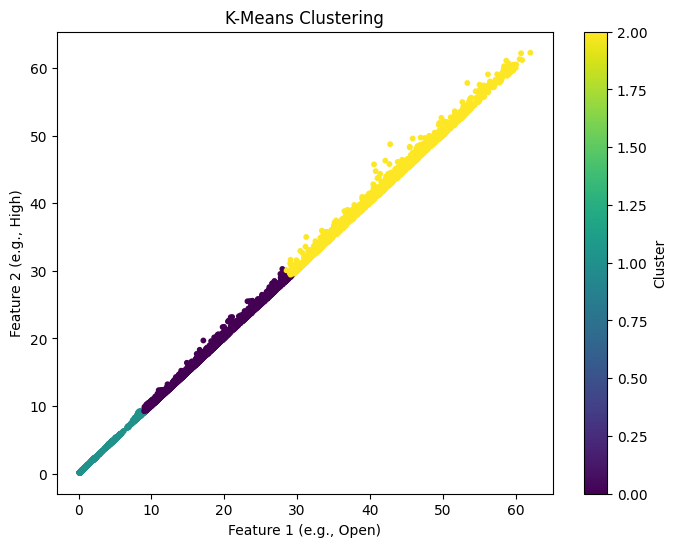

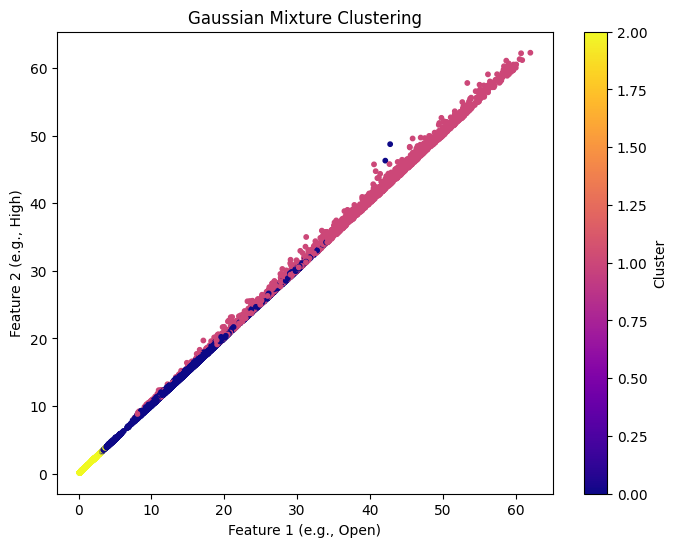

In [ ]:
# Scatter plot untuk K-Means
kmeans_predictions_pandas = kmeans_predictions.select("features", "prediction").toPandas()
features = np.array(kmeans_predictions_pandas["features"].tolist())
predictions = kmeans_predictions_pandas["prediction"]

plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=predictions, cmap="viridis", s=10)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1 (e.g., Open)")
plt.ylabel("Feature 2 (e.g., High)")
plt.colorbar(label="Cluster")
plt.show()

# Scatter plot untuk Gaussian Mixture
gmm_predictions_pandas = gmm_predictions.select("features", "prediction").toPandas()
features_gmm = np.array(gmm_predictions_pandas["features"].tolist())
predictions_gmm = gmm_predictions_pandas["prediction"]

plt.figure(figsize=(8, 6))
plt.scatter(features_gmm[:, 0], features_gmm[:, 1], c=predictions_gmm, cmap="plasma", s=10)
plt.title("Gaussian Mixture Clustering")
plt.xlabel("Feature 1 (e.g., Open)")
plt.ylabel("Feature 2 (e.g., High)")
plt.colorbar(label="Cluster")
plt.show()


**B. Dari ke-4 model tersebut, pilih dua model dengan performa terbaik
(classification & clustering) dan lakukan hyperparameter tuning untuk
melihat perubahan performa yang dihasilkan. Lalu tentukan model
terbaik yang bisa menjadi solusi pada masalah yang Anda tetapkan
diawal.**

Hyperparameter Tuning untuk classification Gradient Boost Tree

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluator untuk AUC
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")

# Evaluator untuk Akurasi dan F1 Score
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

# Membuat grid hyperparameter
paramGrid_gbt = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10, 15]) \
    .addGrid(gbt.maxBins, [32, 64]) \
    .addGrid(gbt.minInstancesPerNode, [1, 5]) \
    .addGrid(gbt.stepSize, [0.1, 0.2]) \
    .build()

# Cross-validator
cv_gbt = CrossValidator(estimator=gbt,
                        estimatorParamMaps=paramGrid_gbt,
                        evaluator=evaluator_auc,
                        numFolds=5)

# Melakukan fitting dengan data
cv_gbt_model = cv_gbt.fit(train)

# Prediksi dengan model terbaik
gbt_tuned_predictions = cv_gbt_model.bestModel.transform(test)

# Evaluasi performa
auc_gbt_tuned = evaluator_auc.evaluate(gbt_tuned_predictions)
accuracy_gbt_tuned = evaluator_accuracy.evaluate(gbt_tuned_predictions)
f1_gbt_tuned = evaluator_f1.evaluate(gbt_tuned_predictions)

# Menampilkan hasil
print("AUC Gradient Boost Tree (Tuned):", auc_gbt_tuned)
print("Akurasi Gradient Boost Tree (Tuned):", accuracy_gbt_tuned)
print("F1 Score Gradient Boost Tree (Tuned):", f1_gbt_tuned)


AUC Gradient Boost Tree (Tuned): 0.7603376775757417
Akurasi Gradient Boost Tree (Tuned): 0.6636155606407322
F1 Score Gradient Boost Tree (Tuned): 0.6594471799434107


Hyperparameter Tuning untuk Clustering K-Means

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Evaluator untuk Silhouette Score
evaluator_clustering = ClusteringEvaluator(predictionCol="prediction", featuresCol="features", metricName="silhouette")

# Melakukan tuning jumlah cluster (k)
best_silhouette = -1
best_k = None
for k in range(2, 10):  # Coba k antara 2 hingga 9
    kmeans_tuned = KMeans(featuresCol="features", predictionCol="prediction", k=k, maxIter=20)
    model_kmeans_tuned = kmeans_tuned.fit(scaled_data)  # Menggunakan data yang sudah diskalakan
    predictions_kmeans_tuned = model_kmeans_tuned.transform(scaled_data)
    silhouette_score_tuned = evaluator_clustering.evaluate(predictions_kmeans_tuned)

    if silhouette_score_tuned > best_silhouette:
        best_silhouette = silhouette_score_tuned
        best_k = k

print("Best k for K-Means:", best_k)
print("Silhouette Score (Tuned):", best_silhouette)


Best k for K-Means: 4
Silhouette Score (Tuned): 0.858420477811826


**c. Jabarkan karakteristik model terbaik yang Anda dapatkan terhadap
korelasinya dengan data. Apakah ada sifat tertentu dari data yang ternyata
cocok dengan model dan sebaliknya?**

Jawaban :

...